In [1]:
from data_reader import DataReader
import pickle
from supporter_countries import SupportModule
from ideology_and_objective import IdeologicalObjectiveModule
import numpy as np
from ideology_homophily_score import IdeologyHomophillyScore
from get_supporter_homophily_from_nag import SupporterHomophillyFromNAG
import pandas as pd

In [2]:
with open("pickles/long_horizon_list.pickle", "rb") as f:
    long_horizon_list = pickle.load(f)
    
with open("pickles/short_horizon_list.pickle", "rb") as f:
    short_horizon_list = pickle.load(f)

In [3]:
df = DataReader().get_pandas_df()

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [4]:
df.columns

Index(['Triadid', 'DyadID', 'ConflictID', 'Startdate1', 'Startdate2', 'Target',
       'TarNum_COW', 'NAG_name', 'NAGcode_1', 'NAGcode_2', 'Incomp', 'Terr',
       'Foundyr', 'Year', 'NAGID_1', 'NAGID_2', 'NAGID_3', 'NAGID_4',
       'NAGID_5', 'NAGEth', 'NAGRel', 'NAGLeft', 'NAGRight', 'NAGDem',
       'NAGAuth', 'NAGDict', 'NAGMil', 'NAGTheo', 'NAGObj_1', 'NAGObj_2',
       'NAGObj_3', 'NAGObj_4', 'NAGObj_5', 'NAGObj_6', 'PolParDummy',
       'PartyName', 'Tar_DomSup', 'Tar_DomSup_Precision', 'StateSupporter',
       'SupNum_COW', 'S_SafeMem', 'S_Precision_SM', 'S_SafeLead',
       'S_Precision_SL', 'S_Offices', 'S_Precision_Head', 'S_TrainCamp',
       'S_Precision_TC', 'S_Training', 'S_Precision_Train', 'S_WeaponLog',
       'S_Precision_WL', 'S_FinAid', 'S_Precision_FinAid', 'S_Transport',
       'S_Precision_Tp', 'S_Troop', 'S_Precision_Tr', 'S_Other',
       'S_Precision_Oth', 'DS_SafeMem', 'DS_Precision_SM', 'DS_SafeLead',
       'DS_Precision_SL', 'DS_Offices', 'DS_Precision_H

In [17]:
supporter_COW = 800

data  

{'supporter_COW': 800,
 'num_of_supporters': 12,
 'sup_duration_mean': 17.25,
 'sup_duration_std': 14.012643100666864}

{'whiskers': [<matplotlib.lines.Line2D at 0x14291c33c88>,
 'caps': [<matplotlib.lines.Line2D at 0x14291c52dc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x14291c45b48>],
 'medians': [<matplotlib.lines.Line2D at 0x14291c58e88>],
 'fliers': [<matplotlib.lines.Line2D at 0x14291c523c8>],
 'means': []}

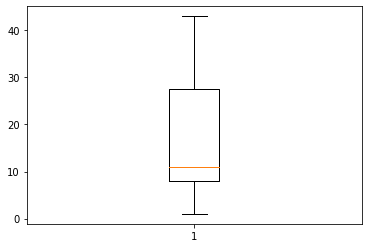

In [11]:
import matplotlib.pyplot as plt

plt.boxplot([8, 8, 43, 1, 26, 11, 10, 15, 1, 32, 11, 41])

In [ ]:
# useless below this

In [ ]:
sup_obj = SupportModule()
homo_obj = SupporterHomophillyFromNAG()

In [ ]:
def get_score(nagcode):
    ideology, nonideology = 0, 0
    support_list = sup_obj.get_supporter_from_NAGcode(nagcode)
    ideology_likelihood, nonideology_likelihood = [], []
    for support_code in support_list:
        info = homo_obj.get_supporter_info(support_code)
        predominant_ideology = info.get('predominant_ideology')
        likelihood = info.get('likelihood')
        if predominant_ideology in ideologies:
            ideology += 1
            ideology_likelihood.append(likelihood)
        elif predominant_ideology == 'no_ideology':
            nonideology += 1
            nonideology_likelihood.append(likelihood)
    data = {"NAGcode": nagcode, "num_of_supporters": len(support_list),
           "ideology": ideology, "nonideology": nonideology,
           "ideology_likelihood":np.median(ideology_likelihood),
            "nonideology_likelihood":np.median(nonideology_likelihood)}
    return data

columns= ["NAGcode", "num_of_supporters", "ideology","nonideology",
         "ideology_likelihood","nonideology_likelihood"]
homophily_df = pd.DataFrame(columns=columns)
ideologies = {'ethno_nationalist', 'religious', 'leftist'}
for nagcode in df['NAGcode_1'].unique():
    data = get_score(nagcode)
    t_df = pd.DataFrame(data, index=[0])
    homophily_df = homophily_df.append(t_df)

In [ ]:
columns= ["NAGcode", "num_of_supporters", "ideology","nonideology",
         "ideology_likelihood","nonideology_likelihood"]
long_homophily_df = pd.DataFrame(columns=columns)
ideologies = {'ethno_nationalist', 'religious', 'leftist'}
for nagcode in long_horizon_list:
    data = get_score(nagcode)
    t_df = pd.DataFrame(data, index=[0])
    long_homophily_df = long_homophily_df.append(t_df)

In [ ]:
long_homophily_df[long_homophily_df['num_of_supporters']>0].mean()

In [ ]:
long_homophily_df[long_homophily_df['num_of_supporters']>0].median()

In [ ]:
long_homophily_df[long_homophily_df['num_of_supporters']>0].count()

In [ ]:
columns= ["NAGcode", "num_of_supporters", "ideology","nonideology",
         "ideology_likelihood","nonideology_likelihood"]
short_homophily_df = pd.DataFrame(columns=columns)
ideologies = {'ethno_nationalist', 'religious', 'leftist'}
for nagcode in short_horizon_list:
    data = get_score(nagcode)
    t_df = pd.DataFrame(data, index=[0])
    short_homophily_df = short_homophily_df.append(t_df)

In [ ]:
short_homophily_df[short_homophily_df['num_of_supporters']>0].mean()

In [ ]:
short_homophily_df[short_homophily_df['num_of_supporters']>0].median()

In [ ]:
short_homophily_df[short_homophily_df['num_of_supporters']>0].count()